In [2]:

import pandas as pd    

# Import Scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
# Note - you will need version 0.24.1 of scikit-learn to load this library (SequentialFeatureSelector)
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.svm import SVC, LinearSVC

# Import numpy 
import numpy as np

# Another statistic model library
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 20})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2


%matplotlib inline

In [3]:
data = pd.read_csv('data.csv')
data.pop('Unnamed: 32')

data['diagnosis'] = data['diagnosis'].replace('B',0);
data['diagnosis'] = data['diagnosis'].replace('M',1);

y = data.diagnosis
X = data.T
x = X[2:]
x = x.T

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
model = SVC(kernel='rbf', gamma=4, C=10000)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
y_predict = model.predict(X_test)

print(r2_score(y_test,y_predict))
accuracy_1 = abs(np.round(r2_score(y_test,y_predict)*100))

-0.6056338028169015


In [6]:
sfs_forward = SequentialFeatureSelector(SVC(kernel = "rbf"), 
                                        n_features_to_select=4,
                                        direction='forward').fit(x, y)

f_names = np.array(data.columns)
selected = sfs_forward.get_support(indices=True)
print("Selected input features using Forward Stepwise Selection:\n", f_names[selected])
columns_names = list(f_names[selected])

if 'diagnosis' in columns_names:
    columns_names.remove('diagnosis')
if 'id' in columns_names:
    columns_names.remove('id')
print(columns_names)

Selected input features using Forward Stepwise Selection:
 ['id' 'radius_mean' 'fractal_dimension_se' 'radius_worst']
['radius_mean', 'fractal_dimension_se', 'radius_worst']


In [7]:
x_manip = data[columns_names]

y = data.diagnosis

X_train_manip, X_test_manip, y_train_2, y_test_2 = train_test_split(x_manip, y, test_size=0.2, random_state=42)

In [8]:
model = SVC(kernel='rbf', gamma=4, C=10000)
model.fit(X_train_manip, y_train_2)
y_predict_2 = model.predict(X_test_manip)

accuracy_2 = np.round(r2_score(y_test_2,y_predict_2)*100)



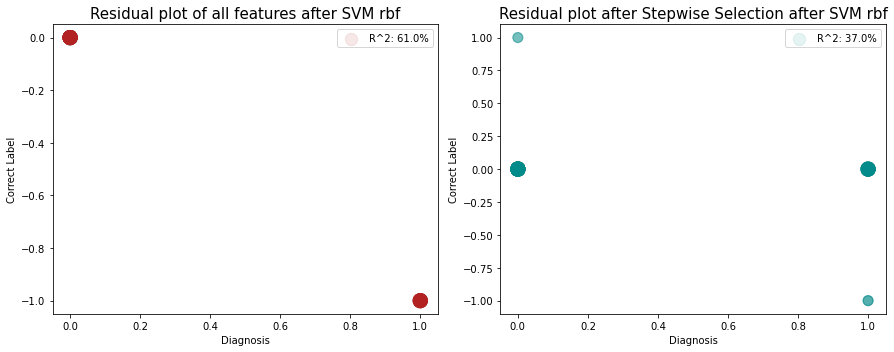

In [9]:
fig,ax = plt.subplots(1,2,figsize=(12.5,5))
ax[0].scatter(y_test, y_predict - y_test, marker='o',s=(200-(100*abs(y_predict_2-y_test_2))),alpha=0.1,c= 'FireBrick',label = "R^2: "+str(accuracy_1)+"%")
ax[0].set_title('Residual plot of all features after SVM rbf', fontsize=15)
ax[0].set_xlabel('Diagnosis')
ax[0].set_ylabel('Correct Label')
ax[0].legend()

ax[1].scatter(y_test_2, y_predict_2 - y_test_2,s=(200-(100*abs(y_predict_2-y_test_2))),alpha=0.1,c= 'DarkCyan',label = "R^2: "+str(accuracy_2)+"%")
ax[1].set_title('Residual plot after Stepwise Selection after SVM rbf', fontsize=15)
ax[1].set_xlabel('Diagnosis')
ax[1].set_ylabel('Correct Label')
ax[1].legend()

plt.tight_layout()